# Проект: телекоммуникации

**Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах.**

### Описание услуг

**Оператор предоставляет два основных типа услуг: 
Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).
Также доступны такие услуги:
Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
Выделенная линия технической поддержки (TechSupport);
Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.**

### Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:

contract_new.csv — информация о договоре;

personal_new.csv — персональные данные клиента;

internet_new.csv — информация об интернет-услугах;

phone_new.csv — информация об услугах телефонии.

Файл contract_new.csv

Скачать файл
customerID — идентификатор абонента;

BeginDate — дата начала действия договора;

EndDate — дата окончания действия договора;

Type — тип оплаты: раз в год-два или ежемесячно;

PaperlessBilling — электронный расчётный лист;

PaymentMethod — тип платежа;

MonthlyCharges — расходы за месяц;

TotalCharges — общие расходы абонента.

Файл personal_new.csv

customerID — идентификатор пользователя;

gender — пол;

SeniorCitizen — является ли абонент пенсионером;

Partner — есть ли у абонента супруг или супруга;

Dependents — есть ли у абонента дети.


Файл internet_new.csv

customerID — идентификатор пользователя;

InternetService — тип подключения;

OnlineSecurity — блокировка опасных сайтов;

OnlineBackup — облачное хранилище файлов для резервного копирования данных;

DeviceProtection — антивирус;

TechSupport — выделенная линия технической поддержки;

StreamingTV — стриминговое телевидение;

StreamingMovies — каталог фильмов.

Файл phone_new.csv

customerID — идентификатор пользователя;

MultipleLines — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

### Ход проекта

1. Загрузка данных и их анализ
2. Объеденение данных
3. Исследовательский анализ и предобработка данных объединённого датафрейма
4. Подготовка данных
5. Обучение моделей машинного обучения
6. Выбор лучшей модели
7. Общий вывод и рекомендации заказчику

In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import phik

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from IPython.display import display
from datetime import datetime

from sklearn.utils.validation import check_is_fitted
import plotly.express as px


from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.metrics import (
    confusion_matrix,
    plot_confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    )

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
RS = 150124

In [4]:
def load(pth1, pth2):
    
    if os.path.exists(pth1):
        df = pd.read_csv(pth1, parse_dates=True)
        return df
    elif os.path.exists(pth2):
        df = pd.read_csv(pth2, parse_dates=True)
        return df
    else:
        print('Something is wrong')

**Функция подгрузки данных**

## Загрузка и знакомство с данными

In [5]:
fold1 = '/datasets/'
fold2 = '/folder_2/'
csv = ['contract_new.csv', 'personal_new.csv', 'internet_new.csv', 'phone_new.csv']

all_df = []
for i in range(len(csv)):
    all_df.append(i)
    all_df[i] = load(fold1+csv[i], fold2+csv[i])
    display(all_df[i].head(10))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


**Перед нами 4 датасета с ключом в виде ID пользователя.**

In [6]:
for i in range(4):
    print('='*15, csv[i], '='*15)
    print()
    all_df[i].info()
    print(end='\n'*3)

=============== contract_new.csv ===============

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB



=============== personal_new.csv ===============

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-nul

### Промежуточный вывод

**На руках 4 датасета, с разным количеством строк, связанные ключом в виде ID пользователя**

**Следующие датасеты требуют обработки**

**Contract_new**
* BeginDate: нужно изменить тип данных на время.
* EndDate: нужно изменить тип данных на время.
* TotalCharges: необходимо изменить тип данных на int.

**Personal_new**
* SeniorCitizen: изменить тип данных на объект.

**C остальными столбцами порядок**

**Также можно было изменить большинство данных на булев тип, но в целом это не сыграет роли.**

## Объеденяем данные

In [7]:
all_df.append(all_df[0])

for i in range(len(csv)-1):
    all_df[-1] = all_df[-1].merge(all_df[i+1], 'outer')#, on='customerID')

In [8]:
all_df[-1]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.2,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.4,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.6,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.8,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


**Соеденяем датасеты.**

In [9]:
df = all_df[-1].copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


### Промежуточный вывод

**На руках один датасет с 7043 строками, множеством пропущенных значений из других датасетов, также требуется изменить типы данных.**

## Предобработка и анализ данных

In [11]:
df.duplicated().sum()

0

**Проверка на дубликаты**

In [12]:
print(len(df['customerID'].unique()))

7043


**Проверка на неявные дубликаты**

In [13]:
df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

**Имеем массу пропущенных значений, далее будем использовать затычку для них.**

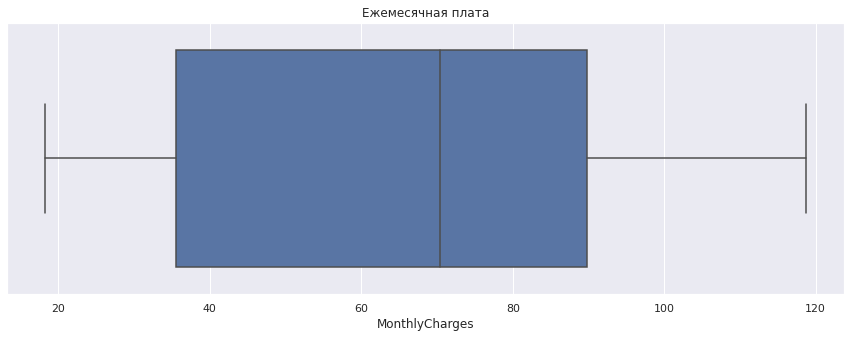

In [14]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x=df['MonthlyCharges']).set_title('Ежемесячная плата');

In [15]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

**В ежемесячных платах выбросов нет.**

In [16]:
df.columns = (df.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower())
df.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

**Приводим столбцы к питоновскому виду.**

In [17]:
print(min(df['begin_date']), max(df['begin_date']))

2013-10-01 2020-02-01


**Смотрим на первую и последнюю дату в датасеты что-бы узнать временной диапозон.**

In [18]:
df[df['total_charges'] == ' '].head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN


**При попытке изменить тип данных была получена ошибка, как оказалось что в последнем месяце вместо цифр имеем значение в виде пустой строки**

In [19]:
df.loc[(df['total_charges'] == ' ') & (df['begin_date'] < '2020-02-01')]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines


In [20]:
df[(df['begin_date'] > '2019-12-01') & (df['type'] != 'Month-to-month')].head(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
222,6469-MRVET,2020-01-01,No,One year,Yes,Electronic check,20.20,20.2,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [21]:
df.loc[df['total_charges'] == ' ', 'total_charges'] = df['monthly_charges']

**Вместо пустой строки вставляем ежемесячную плату**

In [22]:
df['begin_date'] = df['begin_date'].astype('datetime64')
df['senior_citizen'] = df['senior_citizen'].astype('object')
df['total_charges'] = pd.to_numeric(df['total_charges'])
df['total_charges'] = df['total_charges'].astype('int')
df['monthly_charges'] = df['monthly_charges'].astype('int')

df.drop('customer_id', axis=1, inplace=True)

**Меняем тип данных**

**Теперь можно посмотреть на выбросы общей суммы оплаты**

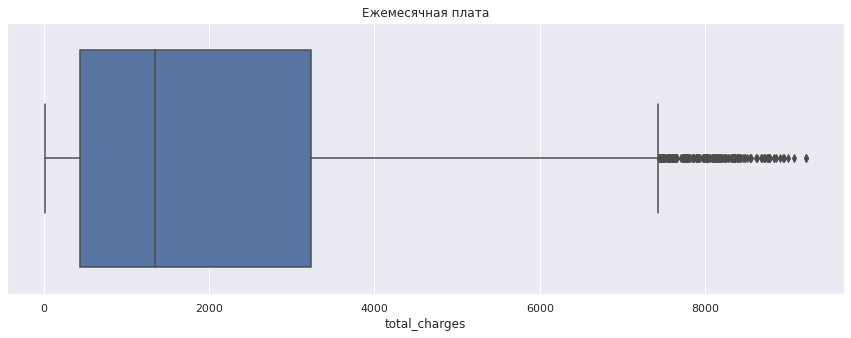

In [23]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x=df['total_charges']).set_title('Ежемесячная плата');

In [24]:
df['total_charges'].describe()

count    7043.000000
mean     2114.922902
std      2112.681856
min        19.000000
25%       436.500000
50%      1343.000000
75%      3236.000000
max      9221.000000
Name: total_charges, dtype: float64

In [25]:
df[df['total_charges'] > 7800]

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
17,2014-03-01,No,Two year,No,Bank transfer (automatic),106,8257,Male,0,No,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Yes
198,2014-02-01,No,Two year,Yes,Bank transfer (automatic),112,8324,Male,0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Yes
369,2014-02-01,No,Two year,Yes,Credit card (automatic),112,8755,Male,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
437,2014-02-01,No,Two year,Yes,Credit card (automatic),114,8211,Male,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
464,2014-02-01,No,Two year,Yes,Bank transfer (automatic),116,8355,Male,1,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6768,2014-02-01,No,Two year,No,Credit card (automatic),117,8713,Female,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
6793,2014-02-01,No,Two year,Yes,Credit card (automatic),108,7804,Male,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Yes
6859,2014-03-01,No,Two year,No,Mailed check,111,7902,Female,0,No,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
6910,2014-04-01,No,Two year,Yes,Electronic check,114,8182,Male,0,No,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes


**В общей оплаченной сумме есть выбросы но это подключившееся с самого начала работы компании**

**Посмотрим на гистограмму количества клиентов прервавших обслуживание**

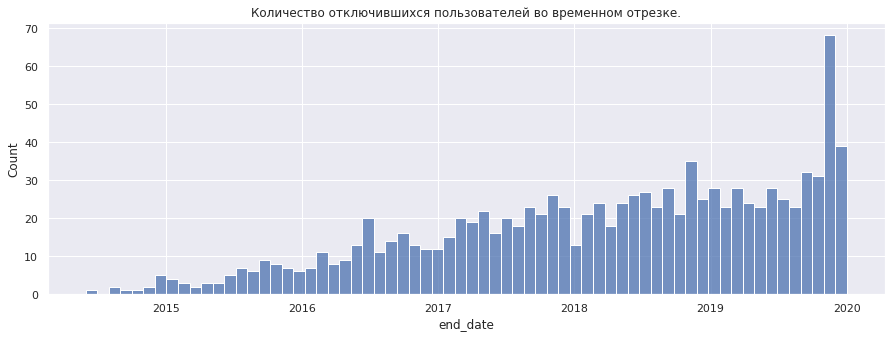

In [26]:
time = df[df['end_date'] != 'No']
time['end_date'] = time['end_date'].astype('datetime64')
sns.histplot(time['end_date'], 
             bins=len(time['end_date'].unique())).set_title('Количество отключившихся пользователей во временном отрезке.');

**В конце 2019 наблюдается выброс отключившихся**

**Посмотрим на подключения**

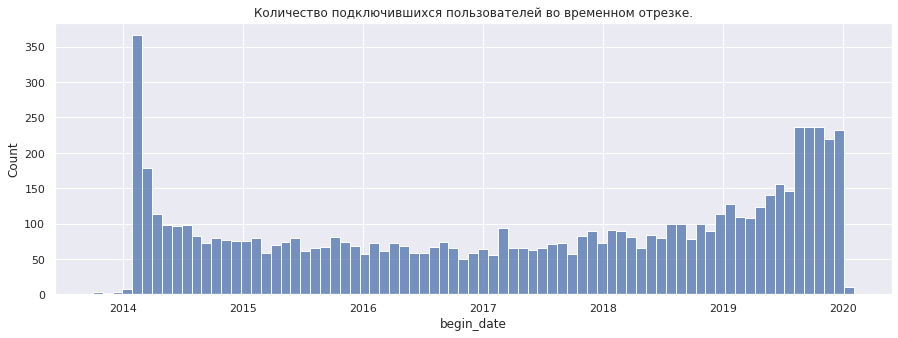

In [27]:
sns.histplot(df['begin_date'], 
             bins=len(df['begin_date'].unique())).set_title('Количество подключившихся пользователей во временном отрезке.');

**В конце 2019 года прилив подключений, вероятно была выгодная акция, и люди просто переподключались.**

**Посмотрим сколько клиентов подключившихся в районе 3х лет назад, отключилось за предидущие пару лет**

In [28]:
print(time[(time['end_date'] > '2018-01-01') & (time['end_date'] < '2019')].count()[0])
x = time[(time['end_date'] > '2018-01-01') & (time['end_date'] < '2019')]
print((x['begin_date'] < '2016-01-01').sum())
time[(time['end_date'] > '2018-01-01') & (time['end_date'] < '2019')].head()

272
170


,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
25,2017-08-01,2018-09-01,Month-to-month,Yes,Bank transfer (automatic),55,726,Female,0,No,No,DSL,Yes,Yes,No,No,No,No,No
30,2014-03-01,2018-11-01,Two year,Yes,Credit card (automatic),96,5395,Female,1,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,No,No,Yes
35,2014-02-01,2018-12-01,Two year,No,Bank transfer (automatic),99,5794,Female,0,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,No,Yes
61,2015-02-01,2018-07-01,Month-to-month,Yes,Bank transfer (automatic),89,3685,Male,0,No,No,Fiber optic,No,Yes,No,No,Yes,No,Yes
104,2014-03-01,2018-03-01,Two year,Yes,Bank transfer (automatic),110,5385,Male,0,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Yes


**Из 272 отключившихся 170 клиентов были подключены больше 3х лет**

In [29]:
print(time[(time['end_date'] > '2019-01-01') & (time['end_date'] < '2020')].count()[0])
x = time[(time['end_date'] > '2019-01-01') & (time['end_date'] < '2020')]
print((x['begin_date'] < '2017-01-01').sum())
time[(time['end_date'] > '2019-01-01') & (time['end_date'] < '2020')].head()

305
187


,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
41,2014-04-01,2019-08-01,Two year,Yes,Credit card (automatic),69,4428,Female,0,Yes,Yes,DSL,Yes,Yes,No,No,Yes,No,Yes
107,2017-06-01,2019-02-01,One year,No,Mailed check,30,603,Female,0,No,No,DSL,Yes,No,No,No,No,No,NaN
113,2016-10-01,2019-06-01,Month-to-month,Yes,Electronic check,76,2448,Female,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes
120,2015-06-01,2019-06-01,One year,Yes,Credit card (automatic),99,4790,Female,0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
148,2017-08-01,2019-11-01,One year,No,Credit card (automatic),64,1776,Male,0,No,Yes,DSL,No,Yes,Yes,No,Yes,No,No


**Из 305 отключившихся 187 клиентов были подключены больше 3х лет, большая часть отключающихся это старые клиенты.**

In [30]:
df['time'] = max(df['begin_date']) - df['begin_date'].where(df['end_date'] == 'No')
df['time'] = (df[df['end_date'] == 'No']['time'] / np.timedelta64(1, 'D')).astype(int)

df['time2'] = time['end_date'] - time['begin_date'].where(df['end_date'] != 'No')
df['time2'] = (df[df['end_date'] != 'No']['time2'] / np.timedelta64(1, 'D')).astype(int)

df['time'] = df['time'].fillna(df['time2'])
df.drop('time2', axis=1, inplace=True)

df['time'] = df['time'].astype('int')

**Создаём фичу в виде общего времени подключения клиента, от самого подключения до отключения либо по нынешнее время(в датасете)**

In [31]:
(time['end_date'] - time['begin_date']).mean()

Timedelta('924 days 20:43:48.882833792')

**Среднее время пребывания в подключенном состоянии 924 дня, что опять говорит о том что отключаются 'старожилы'.**

In [32]:
df.loc[df['end_date'] != 'No', 'end_date'] = 1
df.loc[df['end_date'] == 'No', 'end_date'] = 0
df['end_date'] = df['end_date'].astype('int64')

**Переводим дату отключения в двоичную систему, где 1 - пользователь отключён, 0 - пользователь не отключался. Если этого не сделать модели машинного обучения давали ошибку при попытке сравнения.**

In [33]:
df['begin_date'] = df['begin_date'].astype('object')

**Меняем значения пенсионеров на тип объект**

**Построим матрицу корреляции.**

In [34]:
interval_cols = [x for x in df.columns if df[x].dtype=='int64']

In [35]:
interval_cols.remove('end_date')

In [36]:
interval_cols

['monthly_charges', 'total_charges', 'time']

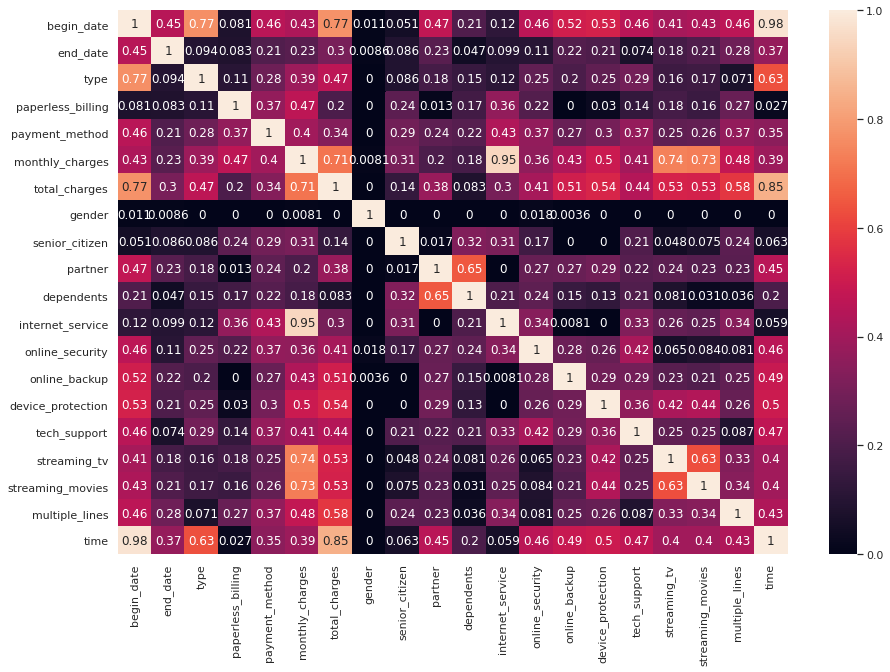

In [37]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.phik_matrix(interval_cols=interval_cols), annot=True);

**Фича time слишком сильно коррелирует с begin_date, также тип подключения(internet_service) слишком сильно коррелирует с ежемесячной платой, gender же практически не обладает коррелирующими признаками, будем удалять**

In [38]:
df.drop(['monthly_charges', 
         'gender', 
         #'online_security', 
         #'online_backup', 
         #'device_protection', 
         #'streaming_movies',
         #'streaming_tv',
         #'tech_support',
         'begin_date',
         #'total_charges',
         'time'
        ], axis=1, inplace=True)

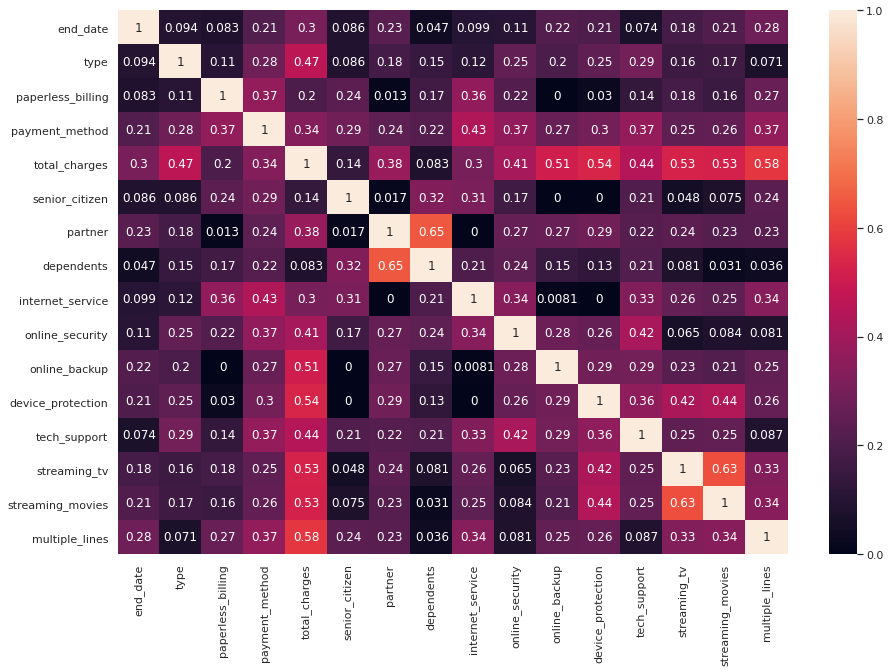

In [39]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.phik_matrix(interval_cols=interval_cols), annot=True);

**Порядок**

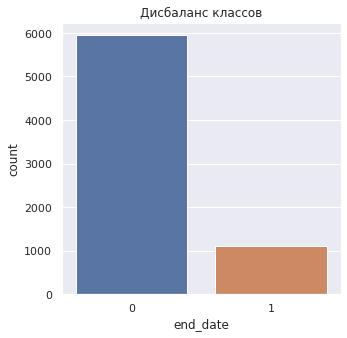

In [40]:
sns.set(rc={'figure.figsize':(5,5)})
target = df['end_date'].astype('int64')
sns.countplot(target).set_title('Дисбаланс классов');

**Баланс классов 6 к 1, так-как будем использовать метрику оценки ROC_AUC то борьбы с дисбалансом не требуется.**

### Промежуточный вывод

**При анализе данных было выявленно что примерно половина отключений приходится на клиентов поключенных в районе 3х лет.**
**Матрица корреляции показала что некоторые признаки слишком сильно коррелируют с другими, были удалены признаки begin_date, monthly_charges. Также признак gender показал практически нулевую корреляцию из-за чего признак тоже был удалён.**
**Проверка на дисбаланс классов показала отношение 6 к 1, так-как на метрику ROC_AUC дисбаланс классов оказывает слабое влияние то данные оставили как есть.**

## Подготовка данных

In [41]:
X = df.drop('end_date', axis=1)
y = df['end_date']                     # Разделяем выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
num = [x for x in X_train.columns if X_train[x].dtype!='object']
cat = [x for x in X_train.columns if X_train[x].dtype=='object'] # Создаём списки категориальных и нумерных колонок.

#encoder_ohe = OneHotEncoder(handle_unknown='ignore', drop='first') # Настриваем кодировщик

encoder_ord = OrdinalEncoder()

std_scaler = StandardScaler()
pipe_num = Pipeline([('scaler', std_scaler)]) # Конвеер трансформации числовых столбцов

s_imputer = SimpleImputer(strategy='constant', fill_value='does not use the services')

**Так-как мы знаем о клиентах всё то пропуски можно определить как - клиент не пользуется услугами**

In [43]:
# Конвеер трансформации категориальнов столбцов     
pipe_cat = Pipeline([('imputer', s_imputer), ('encoder', encoder_ord)])

# Ветвление трансформеров
col_transformer = ColumnTransformer([('num_preproc', pipe_num, num),
                                     ('cat_preproc', pipe_cat, cat)])

## Обучение моделей

### LGBMClassifier

In [44]:
model_lg = LGBMClassifier(random_state = RS)

params = {
    'model__num_leaves': [2, 3, 4, 5, 20],
    'model__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'model__max_depth': [None, 3, 5],
    'model__n_estimators': [1, 3],
    'model__num_iterations': [100, 200]
}

In [45]:
final_pipe = Pipeline([('preproc', col_transformer),
                       ('model', model_lg)])

grid = GridSearchCV(final_pipe, param_grid = params, cv=3, scoring = 'roc_auc')

In [46]:
%%time
grid.fit(X_train, y_train)

CPU times: user 6min 48s, sys: 2.96 s, total: 6min 51s
Wall time: 6min 57s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num_preproc',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['total_charges']),
                                                                        ('cat_preproc',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='does '
                                                                                                                   'not '
                                                                                                                   'use '
                                                                                                                   'the '
                                                                                                                   'services',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['type',
                                                                          'paperless_billing',
                                                                          'pa...
                                                                          'online_backup',
                                                                          'device_protection',
                                                                          'tech_support',
                                                                          'streaming_tv',
                                                                          'streaming_movies',
                                                                          'multiple_lines'])])),
                                       ('model',
                                        LGBMClassifier(random_state=150124))]),
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'model__max_depth': [None, 3, 5],
                         'model__n_estimators': [1, 3],
                         'model__num_iterations': [100, 200],
                         'model__num_leaves': [2, 3, 4, 5, 20]},
             scoring='roc_auc')

In [47]:
lg_param = grid.best_params_
lg_score = grid.best_score_

print('Лучшие гиперпараметры модели')
print(lg_param)

print('score:')
print('LGBMClassifier ROC_AUC:', lg_score)

Лучшие гиперпараметры модели
{'model__learning_rate': 0.2, 'model__max_depth': None, 'model__n_estimators': 1, 'model__num_iterations': 200, 'model__num_leaves': 3}
score:
LGBMClassifier ROC_AUC: 0.8120209432268445


In [48]:
%%time
model_lg = LGBMClassifier(learning_rate = 0.2, 
                         max_depth = None,
                         n_estimators = 1, 
                         num_iterations = 200,
                         num_leaves = 3, 
                         random_state= RS)

final_pipe = Pipeline([('preproc', col_transformer),
                       ('model', model_lg)])

LGBMC = final_pipe.fit(X_train, y_train)

CPU times: user 313 ms, sys: 0 ns, total: 313 ms
Wall time: 260 ms


In [49]:
%%time
predictions = LGBMC.predict(X_train)

CPU times: user 57.2 ms, sys: 3.84 ms, total: 61.1 ms
Wall time: 25.8 ms


**LGBMClassifier**

**Значение ROC_AUC на тренировачной выборке 0.81, время подбора гиперпараметров 6 минут 57 секунд, время обучения модели с лучшими гиперпараметрами 2.6 секунды, время предсказания 0.25 секунды.**

### PassiveAggressiveClassifier

In [50]:
%%time
model_pac = PassiveAggressiveClassifier(random_state=RS)

final_pac = Pipeline([('preproc', col_transformer),
                       ('model', model_pac)])

params = {
    'model__max_iter': [50, 100],
    'model__C': [0.01, 1, 5, 10, 20],
}

grid_pac = GridSearchCV(final_pac, param_grid = params, cv=3, scoring='roc_auc')

grid_pac.fit(X_train, y_train)

CPU times: user 3.56 s, sys: 2.48 s, total: 6.03 s
Wall time: 6.09 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num_preproc',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['total_charges']),
                                                                        ('cat_preproc',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='does '
                                                                                                                   'not '
                                                                                                                   'use '
                                                                                                                   'the '
                                                                                                                   'services',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['type',
                                                                          'paperless_billing',
                                                                          'payment_method',
                                                                          'senior_citizen',
                                                                          'partner',
                                                                          'dependents',
                                                                          'internet_service',
                                                                          'online_security',
                                                                          'online_backup',
                                                                          'device_protection',
                                                                          'tech_support',
                                                                          'streaming_tv',
                                                                          'streaming_movies',
                                                                          'multiple_lines'])])),
                                       ('model',
                                        PassiveAggressiveClassifier(random_state=150124))]),
             param_grid={'model__C': [0.01, 1, 5, 10, 20],
                         'model__max_iter': [50, 100]},
             scoring='roc_auc')

In [51]:
print('Лучшие гиперпараметры модели')
print(grid_pac.best_params_)

print('score:')
print('PassiveAgressiveClassifier ROC_AUC_score:', grid_pac.best_score_)

Лучшие гиперпараметры модели
{'model__C': 0.01, 'model__max_iter': 50}
score:
PassiveAgressiveClassifier ROC_AUC_score: 0.6416349456386018


In [52]:
%%time
grid_pac.fit(X_train, y_train)

CPU times: user 3.55 s, sys: 2.46 s, total: 6.01 s
Wall time: 6 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num_preproc',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['total_charges']),
                                                                        ('cat_preproc',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='does '
                                                                                                                   'not '
                                                                                                                   'use '
                                                                                                                   'the '
                                                                                                                   'services',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['type',
                                                                          'paperless_billing',
                                                                          'payment_method',
                                                                          'senior_citizen',
                                                                          'partner',
                                                                          'dependents',
                                                                          'internet_service',
                                                                          'online_security',
                                                                          'online_backup',
                                                                          'device_protection',
                                                                          'tech_support',
                                                                          'streaming_tv',
                                                                          'streaming_movies',
                                                                          'multiple_lines'])])),
                                       ('model',
                                        PassiveAggressiveClassifier(random_state=150124))]),
             param_grid={'model__C': [0.01, 1, 5, 10, 20],
                         'model__max_iter': [50, 100]},
             scoring='roc_auc')

In [53]:
%%time
pred = grid_pac.predict(X_train)

CPU times: user 22.5 ms, sys: 43 µs, total: 22.6 ms
Wall time: 20.3 ms


**PassiveAggressiveClassifier**

**Значение ROC_AUC на тренировачной выборке 0.64, время подбора гиперпараметров 6 секунд, время обучения модели с лучшими гиперпараметрами 6 секунд, время предсказания 0.2 секунды.**

 ### Промежуточный вывод
 
 **Были проверенны две модели PassiveAggressiveClassifier и LGBMClassifier**
 
 **LGBMClassifier показала лучший результат в 0.81 ROC_AUC в следствии чего была выбрана лучшей моделью**

## Тестирование лучшей модели

In [54]:
pred = LGBMC.predict(X_test)
pred_proba = LGBMC.predict_proba(X_test)
pred_test = pred_proba[:, 1]
ras = roc_auc_score(y_test, pred_test)
print('ROC_AUC лучшей модели на тестовой выборке: %.4f' % ras)
print('accuracy лучшей модели на тестовой выборке: %.4f' % accuracy_score(y_test, pred))

ROC_AUC лучшей модели на тестовой выборке: 0.8539
accuracy лучшей модели на тестовой выборке: 0.8711


**LGBMClassifier на тестовой выборке показал 0.85 ROC_AUC, accuracy показывает что модель правильно предсказывает уйдёт клиент или останется 87% случаях.**

### Важность признаков модели

In [55]:
LGBMC['model'].feature_importances_

array([154,  43,   7,  17,   5,  12,   3,  74,   9,  19,   7,   1,   7,
         9,  33], dtype=int32)

In [56]:
LGBMC['preproc'].get_feature_names_out()

array(['num_preproc__total_charges', 'cat_preproc__type',
       'cat_preproc__paperless_billing', 'cat_preproc__payment_method',
       'cat_preproc__senior_citizen', 'cat_preproc__partner',
       'cat_preproc__dependents', 'cat_preproc__internet_service',
       'cat_preproc__online_security', 'cat_preproc__online_backup',
       'cat_preproc__device_protection', 'cat_preproc__tech_support',
       'cat_preproc__streaming_tv', 'cat_preproc__streaming_movies',
       'cat_preproc__multiple_lines'], dtype=object)

In [57]:
imp = pd.DataFrame(data={'score': grid.best_estimator_._final_estimator.feature_importances_}, 
             index=grid.best_estimator_['preproc'].get_feature_names_out())

imp.sort_values(by='score', ascending=False)

,score
num_preproc__total_charges,154
cat_preproc__internet_service,74
cat_preproc__type,43
cat_preproc__multiple_lines,33
cat_preproc__online_backup,19
cat_preproc__payment_method,17
cat_preproc__partner,12
cat_preproc__online_security,9
cat_preproc__streaming_movies,9
cat_preproc__paperless_billing,7


**Больше всего внимание модели уделяется общей сумме платежей, далее идёт тип подключения и тип оплаты это говорит о том что уход клиентов по большей части связан со стоимостью и типом подключения.**

             Матрица ошибок


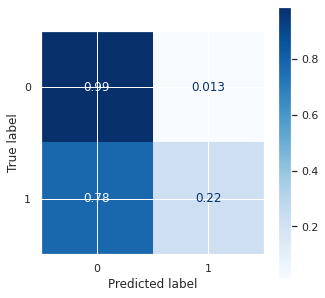

In [58]:
plot_confusion_matrix(estimator=LGBMC, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues');
print('             Матрица ошибок');

             Матрица ошибок


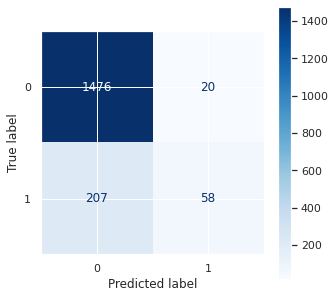

In [59]:
plot_confusion_matrix(estimator=LGBMC, X=X_test, y_true=y_test, cmap='Blues');
print('             Матрица ошибок');

**Матрица ошибок показывает что модель предсказывает уход клиента в 22% случаев.**

## Общий вывод

### Загрузка и ознакомление с данными.

**В загрузке 4 датасета, связанные ключом в виде ID пользователя**

**Было выяснено что датасеты требуют предобработки типов данных, изменение названий колонок, также при объеденение датасетов получились пропущенные значения.**

### Анализ и предобработка данных

**При анализе данных было выявленно что примерно половина отключений приходится на клиентов поключенных в районе 3х лет.**
**Матрица корреляции показала что некоторые признаки слишком сильно коррелируют с другими, были удалены признаки begin_date, monthly_charges, total_charges. Также признак gender показал практически нулевую корреляцию из-за чего признак тоже был удалён.**
**Проверка на дисбаланс классов показала отношение 6 к 1, так-как на метрику ROC_AUC дисбаланс классов оказывает слабое влияние то данные оставили как есть.**

### Подготовка данных

**Выполнено разделение данных на тренировачные и тестовые в соотношении 4 к 1**

**Выполнена инициализация Pipeline, для кодировки данных использован ordinal_encoder, использован конвеер трансформации числовых столбцов std_scaler.**

### Обучение моделей

**Обучены две модели, LGBMClassifier и PassiveAggressiveClassifier**

**LGBMClassifier с гиперпараметрами 
                         learning_rate 0.2, 
                         max_depth None,
                         n_estimators 1, 
                         num_iterations 200,
                         num_leaves 3. При кроссвалидации показал 0.81 ROC_AUC**

**Время подбора гиперпараметров 6 минут 57 секунд, время обучения модели с лучшими гиперпараметрами 2.6 секунды, время предсказания 0.25 секунды.**

**PassiveAgressiveClassifier с гиперпараметрами max_iter 50, C: 0.01. При кроссвалидации показал 0.64 ROC_AUC**

**Время подбора гиперпараметров 6 секунд, время обучения модели с лучшими гиперпараметрами 6 секунд, время предсказания 0.2 секунды.**

**Лучшей моделью выбрана LGBMClassifier**

### Тестирование лучшей модели

**LGBMClassifier на тестовой выборке показал 0.85 ROC_AUC, accuracy показывает что модель правильно предсказывает уйдёт клиент или останется 87% случаях.**

### Важность признаков и матрица ошибок.

**Больше всего внимание модели уделяется общей сумме платежей, далее идёт тип подключения и тип оплаты это говорит о том что уход клиентов по большей части связан со стоимостью и типом подключения.**

**Матрица ошибок показывает что модель предсказывает уход клиента в 23% случаев.**

### Рекомендуемая модель

**Заказчику рекомендуется модель LGBMClassifier с гиперпараметрами 
                         learning_rate 0.2, 
                         max_depth None,
                         n_estimators 1, 
                         num_iterations 200,
                         num_leaves 3.**